In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
model = pybamm.lithium_ion.DFN(options={
    "SEI": "constant",
    "SEI porosity change": "true",
    "SEI on cracks": "true",
    "particle mechanics": "constant cracks",
    "contact resistance": "true",
})

param = pybamm.ParameterValues("OKane2023")

exp = pybamm.Experiment(
    [("Rest for 60 seconds (1 second period)", "Discharge at 2C for 72 seconds or until 2.5V (0.1 second period)", 
    "Rest for 1 hour (1 second period)")] * 25,
)

var_pts = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 200,  # negative particle
    "r_p": 50,  # positive particle
}

sim = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=var_pts)
sol = sim.solve()

At t = 0.00445345 and h = 2.51391e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00445345 and h = 1.67875e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00195904, , mxstep steps taken before reaching tout.
At t = 0.00195904 and h = 2.83285e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00195904 and h = 1.77872e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00312298 and h = 1.1061e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00312298, , mxstep steps taken before reaching tout.
At t = 0.00245215 and h = 9.42424e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00245215, , mxstep steps taken before reaching tout.
At t = 0.00245215, , mxstep steps taken before reaching tout.


In [3]:
t_seconds = sol["Time [s]"].entries
t_hours = (t_seconds - 60) / 3600
I = sol["Current [A]"].entries
Q = sol["Discharge capacity [A.h]"].entries
V = sol["Terminal voltage [V]"].entries

In [4]:
# import experimental GITT data from file
GITT_data = pd.read_csv(
    "/mnt/c/Users/sokane/pybamm_data/validation_data/2C_GITT_25deg_Niall.csv", comment="#", header=None
).to_numpy()
t_exp = GITT_data[:,0]/3600
I_exp = -GITT_data[:,3]/1000
V_exp = GITT_data[:,2]
#Q_exp = GITT_data[:,1]/1000
Q_exp = []
for i in range (len(t_exp)):
    Q_temp = np.trapz(I_exp[0:i],t_exp[0:i])
    Q_exp.append(Q_temp)

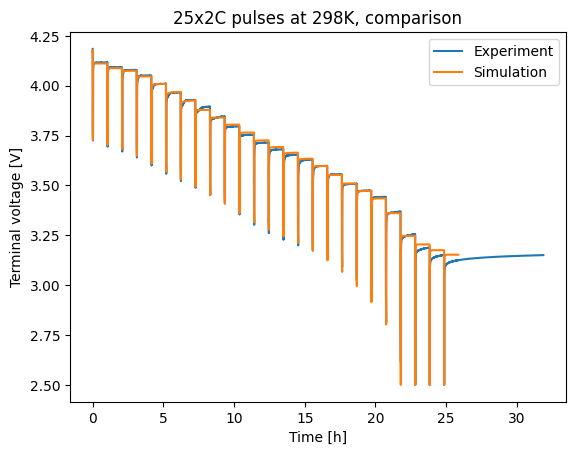

In [7]:
fig, ax = plt.subplots()
ax.plot(t_exp,V_exp,label='Experiment')
ax.plot(t_hours,V,label='Simulation')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Terminal voltage [V]')
ax.set_title('25x2C pulses at 298K, comparison')
ax.legend()
#plt.xlim(10.36,10.39)
#plt.ylim(3.3,3.8)
plt.savefig('/mnt/c/Users/sokane/pybamm_data/validation_data/GITT_2C_discharge_298K.png')
plt.show()